In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

!pip install --upgrade plotly
!pip install peakutils
import plotly as py
import plotly.graph_objs as go
import plotly.tools as tools
import plotly.figure_factory as ff
import peakutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 5.3 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Design Credits/DC_DATA.csv')
data

,x,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,y145,y146,y147,y148,y149,y150,y151,y152,y153,y154
0,-62.747,5255.90423,4490.43414,4650.49157,5963.47529,4080.75080,3871.29876,4969.91023,3708.27911,3599.78272,...,7988.06034,5764.11976,5616.51037,7466.24132,5317.70741,5180.52599,7039.20478,5264.15614,4741.27632,6354.53847
1,-61.347,5209.14888,4459.90407,4612.00234,5908.15362,4043.93096,3843.02211,4923.74336,3674.60357,3573.15090,...,7903.31736,5720.12902,5571.46672,7391.63146,5273.92929,5134.98156,6974.71839,5222.75947,4702.39325,6292.32898
2,-59.947,5157.56630,4421.54142,4561.35968,5844.92904,4004.22178,3808.18067,4871.78135,3634.75197,3544.45902,...,7818.43246,5666.30982,5520.11209,7307.86323,5221.74394,5082.43753,6899.15713,5174.21758,4660.68007,6226.32476
3,-58.547,5100.46748,4374.04220,4503.05269,5778.88504,3960.81207,3764.37544,4812.15376,3588.63588,3510.32247,...,7728.24727,5603.29975,5454.26794,7218.25831,5162.32535,5025.21230,6811.63784,5120.70779,4610.54237,6151.97541
4,-57.148,5043.86927,4326.64706,4447.80699,5709.49304,3914.76353,3719.30446,4754.79891,3545.81348,3475.00082,...,7635.72889,5545.75780,5390.15313,7128.94875,5102.53901,4966.99654,6729.29871,5062.42670,4560.39028,6084.74741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,2221.181,15580.01387,14260.89379,14741.53672,18722.57734,12786.01100,12318.66403,15897.19709,11937.32867,11340.75784,...,25910.30307,18130.99062,17838.68346,23647.40324,16316.12590,15586.55683,21635.22327,16196.94028,14353.77618,19443.34233
1994,2222.004,15567.77447,14247.92752,14726.00731,18701.85213,12773.29483,12323.09431,15888.87500,11928.61168,11337.39010,...,25880.55194,18115.44188,17822.08206,23629.45220,16307.11973,15563.82710,21625.92710,16167.46764,14326.22867,19418.72489
1995,2222.826,15563.59800,14239.76874,14720.07354,18693.11169,12756.18089,12330.90427,15893.15307,11917.57137,11338.36418,...,25840.11673,18096.39169,17807.66413,23622.35348,16297.66149,15548.35198,21599.87322,16144.12210,14307.83953,19400.52332
1996,2223.648,15563.37011,14227.62641,14721.26029,18692.15900,12746.73498,12327.41270,15894.85978,11912.69766,11337.44563,...,25803.72471,18086.89149,17806.46133,23628.90181,16288.45663,15536.13314,21569.54495,16136.35575,14299.94155,19382.01901


In [ ]:
x=data["x"]
y=data["y1"]
x

0        -62.747
1        -61.347
2        -59.947
3        -58.547
4        -57.148
          ...   
1993    2221.181
1994    2222.004
1995    2222.826
1996    2223.648
1997    2224.469
Name: x, Length: 1998, dtype: float64

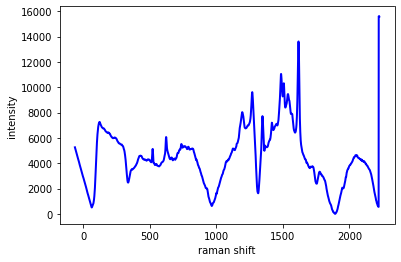

In [ ]:
plt.plot(x, y, linewidth=2, linestyle="-", c="b")
plt.xlabel("raman shift")
plt.ylabel("intensity")
plt.show()
plt.close()

# **Noise Removal**

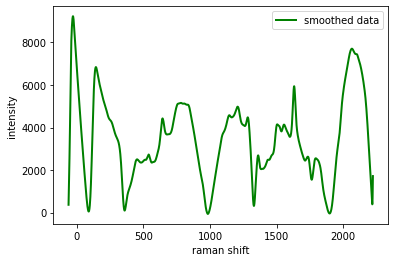

In [ ]:
from scipy.signal import lfilter

n = 15  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
yy = lfilter(b,a,y)
plt.xlabel("raman shift")
plt.ylabel("intensity")
plt.plot(x, yy, linewidth=2,label="smoothed data", linestyle="-", c="g")  # smooth by filter
plt.legend()
plt.show()

# **Baseline Correction**

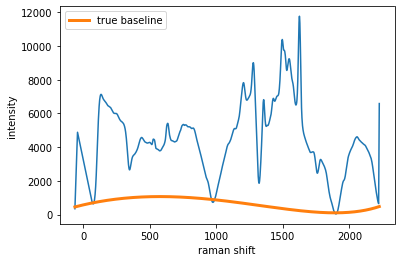

In [ ]:
baseline_values = peakutils.baseline(yy)
plt.xlabel("raman shift")
plt.ylabel("intensity")
plt.plot(x, yy,  lw=1.5)
plt.plot(x, baseline_values, lw=3, label='true baseline')
plt.legend()
plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


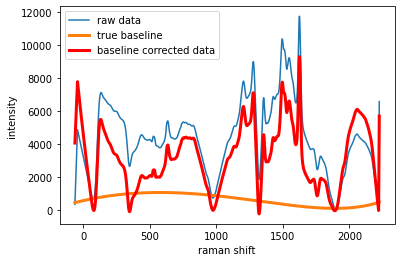

In [ ]:
!pip install BaselineRemoval
from BaselineRemoval import BaselineRemoval

polynomial_degree=5 #only needed for Modpoly and IModPoly algorithm

baseObj=BaselineRemoval(yy)

Modpoly_output=baseObj.ModPoly(polynomial_degree)

plt.xlabel("raman shift")
plt.ylabel("intensity")
plt.plot(x, yy,  lw=1.5,label='raw data')
plt.plot(x, baseline_values, lw=3, label='true baseline')
plt.plot(x,Modpoly_output,lw=3, label='baseline corrected data',color='r')
plt.legend()
plt.show()

In [ ]:
for j in range(1998) :
        data["y1"][j]=Modpoly_output[j]
data

,x,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,y145,y146,y147,y148,y149,y150,y151,y152,y153,y154
0,-62.747,4069.790301,4490.43414,4650.49157,5963.47529,4080.75080,3871.29876,4969.91023,3708.27911,3599.78272,...,7988.06034,5764.11976,5616.51037,7466.24132,5317.70741,5180.52599,7039.20478,5264.15614,4741.27632,6354.53847
1,-61.347,4356.697368,4459.90407,4612.00234,5908.15362,4043.93096,3843.02211,4923.74336,3674.60357,3573.15090,...,7903.31736,5720.12902,5571.46672,7391.63146,5273.92929,5134.98156,6974.71839,5222.75947,4702.39325,6292.32898
2,-59.947,4640.547874,4421.54142,4561.35968,5844.92904,4004.22178,3808.18067,4871.78135,3634.75197,3544.45902,...,7818.43246,5666.30982,5520.11209,7307.86323,5221.74394,5082.43753,6899.15713,5174.21758,4660.68007,6226.32476
3,-58.547,4920.972612,4374.04220,4503.05269,5778.88504,3960.81207,3764.37544,4812.15376,3588.63588,3510.32247,...,7728.24727,5603.29975,5454.26794,7218.25831,5162.32535,5025.21230,6811.63784,5120.70779,4610.54237,6151.97541
4,-57.148,5198.003499,4326.64706,4447.80699,5709.49304,3914.76353,3719.30446,4754.79891,3545.81348,3475.00082,...,7635.72889,5545.75780,5390.15313,7128.94875,5102.53901,4966.99654,6729.29871,5062.42670,4560.39028,6084.74741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,2221.181,1883.308949,14260.89379,14741.53672,18722.57734,12786.01100,12318.66403,15897.19709,11937.32867,11340.75784,...,25910.30307,18130.99062,17838.68346,23647.40324,16316.12590,15586.55683,21635.22327,16196.94028,14353.77618,19443.34233
1994,2222.004,2837.029092,14247.92752,14726.00731,18701.85213,12773.29483,12323.09431,15888.87500,11928.61168,11337.39010,...,25880.55194,18115.44188,17822.08206,23629.45220,16307.11973,15563.82710,21625.92710,16167.46764,14326.22867,19418.72489
1995,2222.826,3792.927737,14239.76874,14720.07354,18693.11169,12756.18089,12330.90427,15893.15307,11917.57137,11338.36418,...,25840.11673,18096.39169,17807.66413,23622.35348,16297.66149,15548.35198,21599.87322,16144.12210,14307.83953,19400.52332
1996,2223.648,4750.969727,14227.62641,14721.26029,18692.15900,12746.73498,12327.41270,15894.85978,11912.69766,11337.44563,...,25803.72471,18086.89149,17806.46133,23628.90181,16288.45663,15536.13314,21569.54495,16136.35575,14299.94155,19382.01901


# **Finding Peaks**

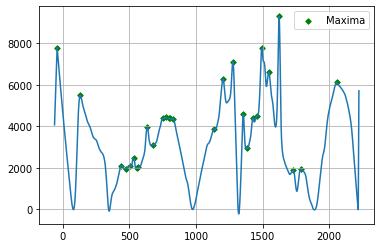

In [ ]:
from scipy.signal import find_peaks
#Find peaks
peaks = find_peaks(Modpoly_output, height = 1)
height = peaks[1]['peak_heights'] #list of the heights of the peaks
peak_pos = x[peaks[0]] #list of the peaks positions
#Plotting
fig = plt.figure()
ax = fig.subplots()
ax.plot(x,Modpoly_output)
ax.scatter(peak_pos, height, color = 'g', s = 15, marker = 'D', label = 'Maxima')
ax.legend()
ax.grid()
plt.show()

In [ ]:
peak_pos

14       -43.163
140      131.588
369      441.378
394      474.522
416      503.571
436      529.883
465      567.869
517      635.480
545      671.614
608      752.199
623      771.237
644      797.793
667      826.746
920     1135.711
976     1201.633
1041    1276.978
1110    1355.553
1132    1380.297
1174    1427.114
1237    1496.291
1251    1511.491
1286    1549.214
1357    1624.506
1436    1706.316
1460    1730.753
1515    1786.016
1804    2059.011
1809    2063.471
1845    2095.312
Name: x, dtype: float64

In [ ]:
for i in range(2,155) :
    y=data["y"+str(i)]

    yy = lfilter(b,a,y)

    baseline_values = peakutils.baseline(yy)

    baseObj=BaselineRemoval(yy)
    Modpoly_output=baseObj.ModPoly(polynomial_degree)

    peaks = find_peaks(Modpoly_output, height = 1)
    height2 = peaks[1]['peak_heights'] #list of the heights of the peaks
    peak_pos = x[peaks[0]] #list of the peaks positions
    for j in range(1998) :
        data["y"+str(i)][j]=Modpoly_output[j]

data

,x,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,y145,y146,y147,y148,y149,y150,y151,y152,y153,y154
0,-62.747,4069.790301,3838.841996,4072.471857,5156.350766,3598.492508,3442.312653,4384.672841,3381.297175,3141.385167,...,5292.665122,3980.402984,4118.352816,4831.933763,4653.388502,4573.406419,5090.277022,4099.433368,3986.367220,5537.268101
1,-61.347,4356.697368,4079.444208,4319.968622,5474.490245,3815.012584,3647.584057,4648.425807,3576.754749,3332.770428,...,5751.834084,4301.598898,4428.249055,5260.741715,4937.021465,4848.367509,5482.641108,4386.483226,4241.031192,5876.372934
2,-59.947,4640.547874,4317.848123,4564.468610,5788.895969,4029.221253,3850.854238,4909.122744,3769.869423,3522.539253,...,6205.714080,4619.595085,4735.114387,5684.313813,5217.601019,5120.246371,5870.409299,4670.683432,4493.283734,6211.587877
3,-58.547,4920.972612,4553.443269,4805.459425,6099.378141,4240.870539,4051.524393,5166.251066,3960.222374,3710.327539,...,6653.950476,4933.777309,5037.981335,6102.259738,5494.643347,5388.729345,6252.782743,4951.701320,4742.561815,6542.354633
4,-57.148,5198.003499,4786.235224,5043.143718,6405.711729,4449.783248,4249.508925,5419.960746,4148.031994,3896.055157,...,7096.386446,5244.508606,5336.963681,6514.597977,5768.122333,5653.748820,6630.105137,5229.217335,4988.863084,6869.146012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,2221.181,1883.308949,1733.227722,1796.609636,2235.970703,1552.919918,1492.429916,1940.986599,1457.503297,1363.643224,...,3219.757159,2176.909331,2153.099632,2912.848789,1972.687659,1871.121028,2558.804036,1943.577035,1730.395500,2262.146767
1994,2222.004,2837.029092,2611.092848,2706.953021,3388.538387,2339.292205,2250.937842,2922.217398,2194.157280,2059.038036,...,4886.979761,3289.319463,3252.509612,4421.523809,2976.497023,2826.330450,3909.988564,2934.550306,2610.036943,3462.540900
1995,2222.826,3792.927737,3489.186203,3618.431867,4542.527034,3125.519164,3010.615475,3904.313154,2931.326587,2755.507214,...,6553.087318,4402.981200,4353.704115,5932.359543,3980.833131,3782.929627,5262.577922,3925.975222,3489.639771,4663.031943
1996,2223.648,4750.969727,4366.872600,4530.987185,5698.157529,3912.547537,3770.846531,4887.584320,3669.448513,3452.588112,...,8218.669512,5518.489304,5456.511922,7445.301489,4986.605469,4740.025228,6615.236392,4919.612095,4370.784225,5863.301839


In [ ]:
df2=np.array(data.loc[:, data.columns != "x"])
df2=df2.T
df2

array([[4069.79030109, 4356.69736803, 4640.54787437, ..., 3792.92773662,
        4750.96972729, 5710.44473834],
       [3838.84199597, 4079.44420828, 4317.84812261, ..., 3489.18620312,
        4366.87259984, 5244.78491183],
       [4072.47185655, 4319.96862228, 4564.46860989, ..., 3618.43186654,
        4530.98718513, 5444.33949983],
       ...,
       [4099.43336845, 4386.4832261 , 4670.68343187, ..., 3925.97522203,
        4919.61209516, 5915.73545638],
       [3986.36721975, 4241.03119186, 4493.28373389, ..., 3489.63977133,
        4370.78422478, 5252.61560123],
       [5537.26810105, 5876.37293389, 6211.58787655, ..., 4663.03194321,
        5863.30183861, 7063.13966673]])

In [ ]:
from sklearn.decomposition import PCA
principal=PCA(n_components=2)
principal.fit(df2)
df_new=principal.transform(df2)
df_new

array([[-10202.84521079, -18743.54407806],
       [  5231.88731095,  -9751.23455578],
       [   744.23467593, -11693.22629344],
       [-32540.84237854,  -7617.89874641],
       [ 17460.86308737,  -2680.99960186],
       [ 22813.37671272,    341.53195171],
       [ -9418.85717112, -15501.051286  ],
       [ 26035.50685144,   2513.44640933],
       [ 32124.55583792,   7593.11762396],
       [  6382.21114205,  -6820.54131054],
       [ 44208.74440936,  13429.36128237],
       [ 77975.84717105,  29865.93687448],
       [-17493.31399954, -19701.04888967],
       [ 13308.92568846,  -4117.33521098],
       [ 21000.37493372,    926.55712287],
       [-10623.66640954, -14768.06556491],
       [ 33798.83503441,   6400.23395674],
       [ 36335.63873613,   7860.82897095],
       [  5841.61728143,  -6613.58031324],
       [ 44639.98769807,  13291.55162496],
       [ 47519.06300268,  14459.84043648],
       [ 21745.48279044,   3152.83111261],
       [  6010.88779184,  -9367.77577209],
       [ 15

No handles with labels found to put in legend.


<function matplotlib.pyplot.show>

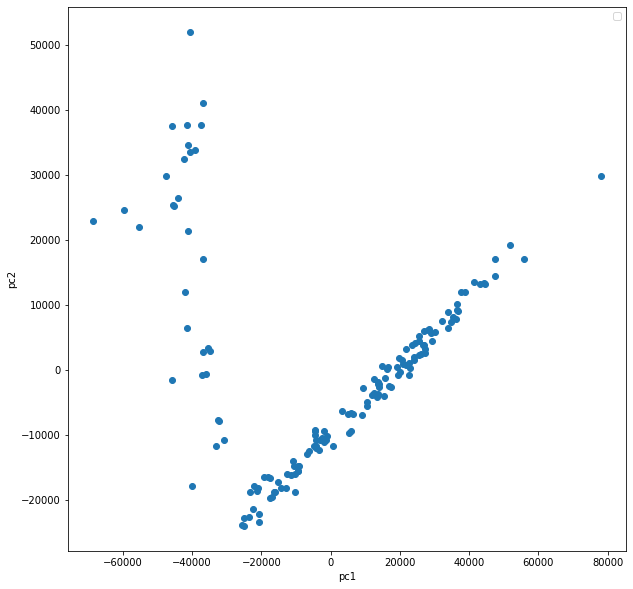

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(df_new[:,0],df_new[:,1],cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.legend()
plt.show

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_new)
y_kmeans = kmeans.predict(df_new)

No handles with labels found to put in legend.


<function matplotlib.pyplot.show>

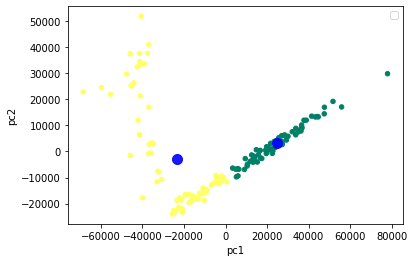

In [ ]:
plt.scatter(df_new[:, 0], df_new[:, 1], c=y_kmeans, s=20, cmap='summer')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=100, alpha=0.9);
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.legend()
plt.show